In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import math
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import dates
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import re
import calendar
import json
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [62]:
### Import Data Dropping Unneccessary Columns ###
os.chdir(r"C:\Users\codlittle\Documents\City Year")
df = pd.read_pickle("combined_and_deduped.pkl")
print(len(df))

849008


In [63]:
for col in df.columns:
    print(col)

CYStudentID
SourceID
LocalStudentID
SchoolID
FLMath
FLELA
IsAfterSchool
FlexibleSupportELA
FlexibleSupportMath
ELessionCount
ELADosage
MathSessionCount
MathDosage
TotalDosage
MetELAGrowth
MetMathGrowth
MetELAPrevention
MetMathPrevention
MetELARecovery
MetMathRecovery
Age
ISELL
Ethnicity
GradeLevel
GradeCohort
Gender
GenderCohort
SchoolName
SiteName
DistrictName
Region
Pre Tag ELA Course Grade
Pre Tag ELA Grade Rank
Post Tag ELA Course Grade
Post Tag ELA Grade Rank
ELA Assessment Name
Pre Tag ELA Assessment
Post Tag ELA Assessment
Post Tag ELA Assessment Target
Pre Tag Math Course Grade
Post Tag Math Course Grade
Math AssessmentName
Pre Tag Math Assessment
Post Tag Math Assessment
Post Tag Math Assessment Target
MathCorpsPerson
ELACorpsPerson
NumofCorpsMembersWorkedWith
SchoolYear
Math Assessment Name
Unnamed: 0
MathCorpsPerson.1
ELACorpsPerson.1
NumofCorpsMembersWorkedWith.1


In [64]:
df["SchoolYear"].value_counts()

18-19    184829
20-21    173432
19-20    173226
17-18    160314
21-22    157207
Name: SchoolYear, dtype: int64

In [65]:
wins = ["MetELAGrowth","MetMathGrowth","MetELAPrevention","MetMathPrevention","MetELARecovery","MetMathRecovery"]
for i in wins:
    print(i)
    print(df[i].value_counts(normalize=True)*100)
    print("----------------------------")
    
### Get calculated variables or metrics based on change in score ###
### Average Length of a session with IQR/standard deviations ###

MetELAGrowth
0    91.720102
1     8.279898
Name: MetELAGrowth, dtype: float64
----------------------------
MetMathGrowth
0    92.502897
1     7.497103
Name: MetMathGrowth, dtype: float64
----------------------------
MetELAPrevention
0    93.314079
1     6.685921
Name: MetELAPrevention, dtype: float64
----------------------------
MetMathPrevention
0    94.278735
1     5.721265
Name: MetMathPrevention, dtype: float64
----------------------------
MetELARecovery
0    98.73947
1     1.26053
Name: MetELARecovery, dtype: float64
----------------------------
MetMathRecovery
0    98.728045
1     1.271955
Name: MetMathRecovery, dtype: float64
----------------------------


In [66]:
metrics = ["ELessionCount","ELADosage","MathSessionCount","MathDosage","TotalDosage"]
for i in metrics:
    print(i)
    print(df[i].describe())
    print("----------------------------")

ELessionCount
count    849008.000000
mean          2.781744
std          10.133132
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         233.000000
Name: ELessionCount, dtype: float64
----------------------------
ELADosage
count    156047.000000
mean        462.092190
std         659.583912
min           0.000000
25%           0.000000
50%         180.000000
75%         825.000000
max       14340.000000
Name: ELADosage, dtype: float64
----------------------------
MathSessionCount
count    849008.000000
mean          2.249713
std           9.160119
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         188.000000
Name: MathSessionCount, dtype: float64
----------------------------
MathDosage
count    156047.000000
mean        365.051164
std         589.380974
min           0.000000
25%           0.000000
50%          29.000000
75%         635.000000
max        9512.000000
Name: MathDosage, 

In [67]:
df[df["TotalDosage"]==15885]

,CYStudentID,SourceID,LocalStudentID,SchoolID,FLMath,FLELA,IsAfterSchool,FlexibleSupportELA,FlexibleSupportMath,ELessionCount,...,Post Tag Math Assessment Target,MathCorpsPerson,ELACorpsPerson,NumofCorpsMembersWorkedWith,SchoolYear,Math Assessment Name,Unnamed: 0,MathCorpsPerson.1,ELACorpsPerson.1,NumofCorpsMembersWorkedWith.1
1290791,CY-912517,a1U2L000004FbuRUAS,429844,{f80f4e3c-35b7-43c7-9aaf-5f369a00ad68},1,1,0.0,0,0,171,...,NaN,Gabriella Marines,Nisa Holley,3.0,21-22,NaN,NaN,Gabriella Marines,Nisa Holley,3.0


In [68]:
ids = ["CYStudentID","SourceID","LocalStudentID","SchoolID"]
for i in ids:
    print(i)
    print(df[i].nunique())
    print('------------------------------')

CYStudentID
629153
------------------------------
SourceID
688694
------------------------------
LocalStudentID
384391
------------------------------
SchoolID
1682
------------------------------


In [69]:
for col in df.columns:
    print(col)

CYStudentID
SourceID
LocalStudentID
SchoolID
FLMath
FLELA
IsAfterSchool
FlexibleSupportELA
FlexibleSupportMath
ELessionCount
ELADosage
MathSessionCount
MathDosage
TotalDosage
MetELAGrowth
MetMathGrowth
MetELAPrevention
MetMathPrevention
MetELARecovery
MetMathRecovery
Age
ISELL
Ethnicity
GradeLevel
GradeCohort
Gender
GenderCohort
SchoolName
SiteName
DistrictName
Region
Pre Tag ELA Course Grade
Pre Tag ELA Grade Rank
Post Tag ELA Course Grade
Post Tag ELA Grade Rank
ELA Assessment Name
Pre Tag ELA Assessment
Post Tag ELA Assessment
Post Tag ELA Assessment Target
Pre Tag Math Course Grade
Post Tag Math Course Grade
Math AssessmentName
Pre Tag Math Assessment
Post Tag Math Assessment
Post Tag Math Assessment Target
MathCorpsPerson
ELACorpsPerson
NumofCorpsMembersWorkedWith
SchoolYear
Math Assessment Name
Unnamed: 0
MathCorpsPerson.1
ELACorpsPerson.1
NumofCorpsMembersWorkedWith.1


In [70]:
colstokeep = df.columns[:21]

In [71]:

17-18
160314
18-19
184829
20-21
173432
19-20
173226
21-22
157207

17-18
33108
18-19
32525
20-21
32172
19-20
31952
21-22
26290

26290

# Data Cleaning and Splitting

In [72]:
### Import Data Dropping Unneccessary Columns ###
os.chdir(r"C:\Users\codlittle\Documents\City Year")
df = pd.read_pickle("combined_and_deduped.pkl")
print(len(df))
keeps = list(df.columns[:21])
extras = ["SchoolYear"]
keeps.extend(extras)


849008


In [73]:
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
def clean_n_write(columns: list, path: str, df: pd.DataFrame) -> str:
    try:
        os.chdir(path)
        for i in df["SchoolYear"].unique():
            x = df[df["SchoolYear"]==i]
            x = x[keeps]
            x = x[~x["TotalDosage"].isna()]
            x.drop_duplicates(inplace=True)
            x.to_pickle(f"clean_{i}.pkl")
        return "Complete"
    except Exception as err:
        return f"Error in the clean and write to pickle files function\n: {str(err)}"
    
clean_n_write(keeps,r"C:\Users\codlittle\Documents\City Year\files",df)

'Complete'

In [74]:
df.columns

Index(['CYStudentID', 'SourceID', 'LocalStudentID', 'SchoolID', 'FLMath',
       'FLELA', 'IsAfterSchool', 'FlexibleSupportELA', 'FlexibleSupportMath',
       'ELessionCount', 'ELADosage', 'MathSessionCount', 'MathDosage',
       'TotalDosage', 'MetELAGrowth', 'MetMathGrowth', 'MetELAPrevention',
       'MetMathPrevention', 'MetELARecovery', 'MetMathRecovery', 'Age',
       'ISELL', 'Ethnicity', 'GradeLevel', 'GradeCohort', 'Gender',
       'GenderCohort', 'SchoolName', 'SiteName', 'DistrictName', 'Region',
       'Pre Tag ELA Course Grade', 'Pre Tag ELA Grade Rank',
       'Post Tag ELA Course Grade', 'Post Tag ELA Grade Rank',
       'ELA Assessment Name', 'Pre Tag ELA Assessment',
       'Post Tag ELA Assessment', 'Post Tag ELA Assessment Target',
       'Pre Tag Math Course Grade', 'Post Tag Math Course Grade',
       'Math AssessmentName', 'Pre Tag Math Assessment',
       'Post Tag Math Assessment', 'Post Tag Math Assessment Target',
       'MathCorpsPerson', 'ELACorpsPerson', 'N

In [75]:
def feature_engineer(df: pd.DataFrame) -> pd.DataFrame:
    x = df
    x["AverageMinutesPerSession_E"] = x["ELessionCount"]/x["ELADosage"]
    x["AverageMinutesPerSession_M"] = x["MathSessionCount"]/x["MathDosage"]
    x['LogTotalDosage'] = np.log(df['TotalDosage'])
    return x

def unsupervised_feature_engineer(features: list, df: pd.DataFrame, clusters: int) -> pd.DataFrame:
    x = df.loc[:, features]
    x_norm = pd.DataFrame(MinMaxScaler().fit_transform(x))
    x_norm.columns = x.columns
    learner = KMeans(n_clusters=clusters)
    clusters = learner.fit(x_norm)
    x['Cluster'] = clusters.labels_
    df['Cluster'] = clusters.labels_
    df['Cluster'] = df['Cluster'].astype(str)
    return df

def evaluate(y_pred,y_actual,metrics,model_name='model'):
    conf_matrix = confusion_matrix(y_actual,y_pred)
    model_metrics = {}
    for (metric_name,metric) in metrics.items():
        result = metric(y_actual,y_pred)
        model_metrics[metric_name] = result
    return conf_matrix, model_metrics

df_1718 = pd.read_pickle("C:/Users/codlittle/Documents/City Year/files/clean_17-18.pkl")
df_1819 = pd.read_pickle("C:/Users/codlittle/Documents/City Year/files/clean_18-19.pkl")
df_2021 = pd.read_pickle("C:/Users/codlittle/Documents/City Year/files/clean_19-20.pkl")
df_2122 = pd.read_pickle("C:/Users/codlittle/Documents/City Year/files/clean_21-22.pkl")

df_in = pd.concat([df_1718,df_1819,df_2021,df_2122])

#df_in['ElessionCount'] = df_in['ElessionCount'].astype(int)
myfeatures = ['ELessionCount', 'ELADosage', 'MathSessionCount', 'MathDosage','TotalDosage']
df = feature_engineer(df_in)
df = unsupervised_feature_engineer(myfeatures,df,5)
df

C:\Users\codlittle\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CYStudentID,SourceID,LocalStudentID,SchoolID,FLMath,FLELA,IsAfterSchool,FlexibleSupportELA,FlexibleSupportMath,ELessionCount,...,MetELAPrevention,MetMathPrevention,MetELARecovery,MetMathRecovery,Age,SchoolYear,AverageMinutesPerSession_E,AverageMinutesPerSession_M,LogTotalDosage,Cluster
12,CY-250290,NaN,NaN,893FC8F6-812F-45D9-95C5-E4D078ABF0F8,0,1,0.0,0,0,59,...,0,0,0,0,NaN,17-18,0.052679,NaN,7.021084,0
13,CY-250291,NaN,NaN,893FC8F6-812F-45D9-95C5-E4D078ABF0F8,0,1,0.0,0,0,34,...,0,0,0,0,NaN,17-18,0.050000,NaN,6.522093,0
58,CY-250336,NaN,NaN,893FC8F6-812F-45D9-95C5-E4D078ABF0F8,0,1,0.0,0,0,59,...,0,0,0,0,NaN,17-18,0.060513,NaN,6.882437,0
59,CY-250337,NaN,NaN,893FC8F6-812F-45D9-95C5-E4D078ABF0F8,0,1,0.0,0,0,45,...,0,0,0,0,NaN,17-18,0.043062,NaN,6.951772,0
72,CY-250350,NaN,NaN,893FC8F6-812F-45D9-95C5-E4D078ABF0F8,0,1,0.0,0,0,61,...,0,0,0,0,NaN,17-18,0.059512,NaN,6.932448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367529,CY-857384,a1U2L000004EwpmUAC,20072920,{8077d9af-b1ec-475d-b8b8-cd2747df678b},0,1,0.0,0,0,39,...,0,0,0,0,13.0,21-22,0.043189,NaN,6.805723,0
1367537,CY-870331,a1U2L000004F0bEUAS,012211M049,{e14e4edf-4ca8-48e0-b649-94a7dbb585c5},0,1,0.0,0,0,51,...,1,0,0,0,12.0,21-22,0.019653,NaN,7.861342,0
1367546,CY-866801,a1U2L000004EzSPUA0,4804401716,{c99cadea-dee4-4075-bc98-7fd3b12433f6},0,0,0.0,1,0,8,...,1,0,0,0,12.0,21-22,0.069565,NaN,4.744932,2
1367557,CY-891240,a1U2L000004FB5HUAW,2881239,{7ba8bffb-6930-4137-a697-e99d16960a76},0,0,0.0,0,0,0,...,1,1,0,0,12.0,21-22,NaN,0.032411,7.142827,1


In [76]:
df['MetELAGrowth'].value_counts(normalize=True)

0    0.785066
1    0.214934
Name: MetELAGrowth, dtype: float64

In [77]:
df['AverageMinutesPerSession_E'].describe()

count    80045.000000
mean         0.044929
std          0.084545
min          0.002020
25%          0.026230
50%          0.033735
75%          0.044344
max          1.000000
Name: AverageMinutesPerSession_E, dtype: float64

In [78]:
df.columns

Index(['CYStudentID', 'SourceID', 'LocalStudentID', 'SchoolID', 'FLMath',
       'FLELA', 'IsAfterSchool', 'FlexibleSupportELA', 'FlexibleSupportMath',
       'ELessionCount', 'ELADosage', 'MathSessionCount', 'MathDosage',
       'TotalDosage', 'MetELAGrowth', 'MetMathGrowth', 'MetELAPrevention',
       'MetMathPrevention', 'MetELARecovery', 'MetMathRecovery', 'Age',
       'SchoolYear', 'AverageMinutesPerSession_E',
       'AverageMinutesPerSession_M', 'LogTotalDosage', 'Cluster'],
      dtype='object')

In [79]:
#ELA

classifier = LogisticRegression(penalty="l2",random_state=500, max_iter = 5000)

features = ['ELessionCount', 'ELADosage', 'Age', 'TotalDosage', 'FlexibleSupportELA', 'FLELA']
target = 'MetELAGrowth'


df = df.fillna(0)
X = df.loc[:,features]
X = pd.get_dummies(X)
y = df[target]
model = classifier.fit(X,y)

y_pred_prob = model.predict_proba(X)
y_pred = model.predict(X)

y_pred_prob[:,1]

df['ELA Prediction'] = y_pred
df['ELA Probability'] = y_pred_prob[:,1]

def get_importance(model, features):
    feature_importance = pd.DataFrame({
        'Variable': features,
        'Coefficent': model.coef_[0]
    }).round(decimals=2) \
    .sort_values('Coefficent',ascending = False).style.bar(color=['red','green'],align='zero')
    return feature_importance
#df_e = df
#df_e.to_excel("2021-2022_ELA.xlsx")
get_importance(model,X.columns)


,Variable,Coefficent
5,FLELA,1.000000
4,FlexibleSupportELA,0.110000
2,Age,0.020000
0,ELessionCount,0.010000
1,ELADosage,0.000000
3,TotalDosage,0.000000


In [80]:
#Math

classifier = LogisticRegression(penalty="l2",random_state=500, max_iter = 5000)

features = ['FLMath','FlexibleSupportMath', 'MathSessionCount', 'MathDosage', 'Age', 'TotalDosage']

target = 'MetMathGrowth'

df = df.fillna(0)
X = df.loc[:,features]
X = pd.get_dummies(X)
y = df[target]
model = classifier.fit(X,y)

y_pred_prob = model.predict_proba(X)
y_pred = model.predict(X)

y_pred_prob[:,1]

df['Math Prediction'] = y_pred
df['Math Probability'] = y_pred_prob[:,1]

def get_importance(model, features):
    feature_importance = pd.DataFrame({
        'Variable': features,
        'Coefficent': model.coef_[0]
    }).round(decimals=2) \
    .sort_values('Coefficent',ascending = False).style.bar(color=['red','green'],align='zero')
    return feature_importance

#df_m = df
#df_m.to_excel("2021-2022_Math.xlsx")
get_importance(model,X.columns)

,Variable,Coefficent
1,FlexibleSupportMath,1.300000
0,FLMath,1.250000
4,Age,0.020000
2,MathSessionCount,0.010000
3,MathDosage,0.000000
5,TotalDosage,0.000000


In [81]:
df['SchoolYear'].value_counts()

17-18    33108
18-19    32525
19-20    31952
21-22    26290
Name: SchoolYear, dtype: int64

In [82]:
df.to_csv('Allyears_withprobs.csv')

## Explainability Tree

In [91]:
#ELA

df_main = df

features = ['MathSessionCount']

target = 'MetMathGrowth'

df_main['MetMathGrowth'] = df_main['MetMathGrowth'].astype(str)

X=df_main.loc[:,features]
X = pd.get_dummies(X)
y = df_main[target]

model = DecisionTreeClassifier(criterion='entropy',random_state=501,max_depth=2).fit(X,y)
y_pred = model.predict(X)

y_matches = (y_pred == y)
accuracy = 100*y_matches.sum()/len(y)
depth = model.get_depth()
leaves = model.get_n_leaves()

print("-------------------")
print(f"Model Accuracy: {accuracy}")
print(f"Model Depth: {depth}")
print(f"Model Leaves: {leaves}")

-------------------
Model Accuracy: 81.88738647830475
Model Depth: 2
Model Leaves: 3


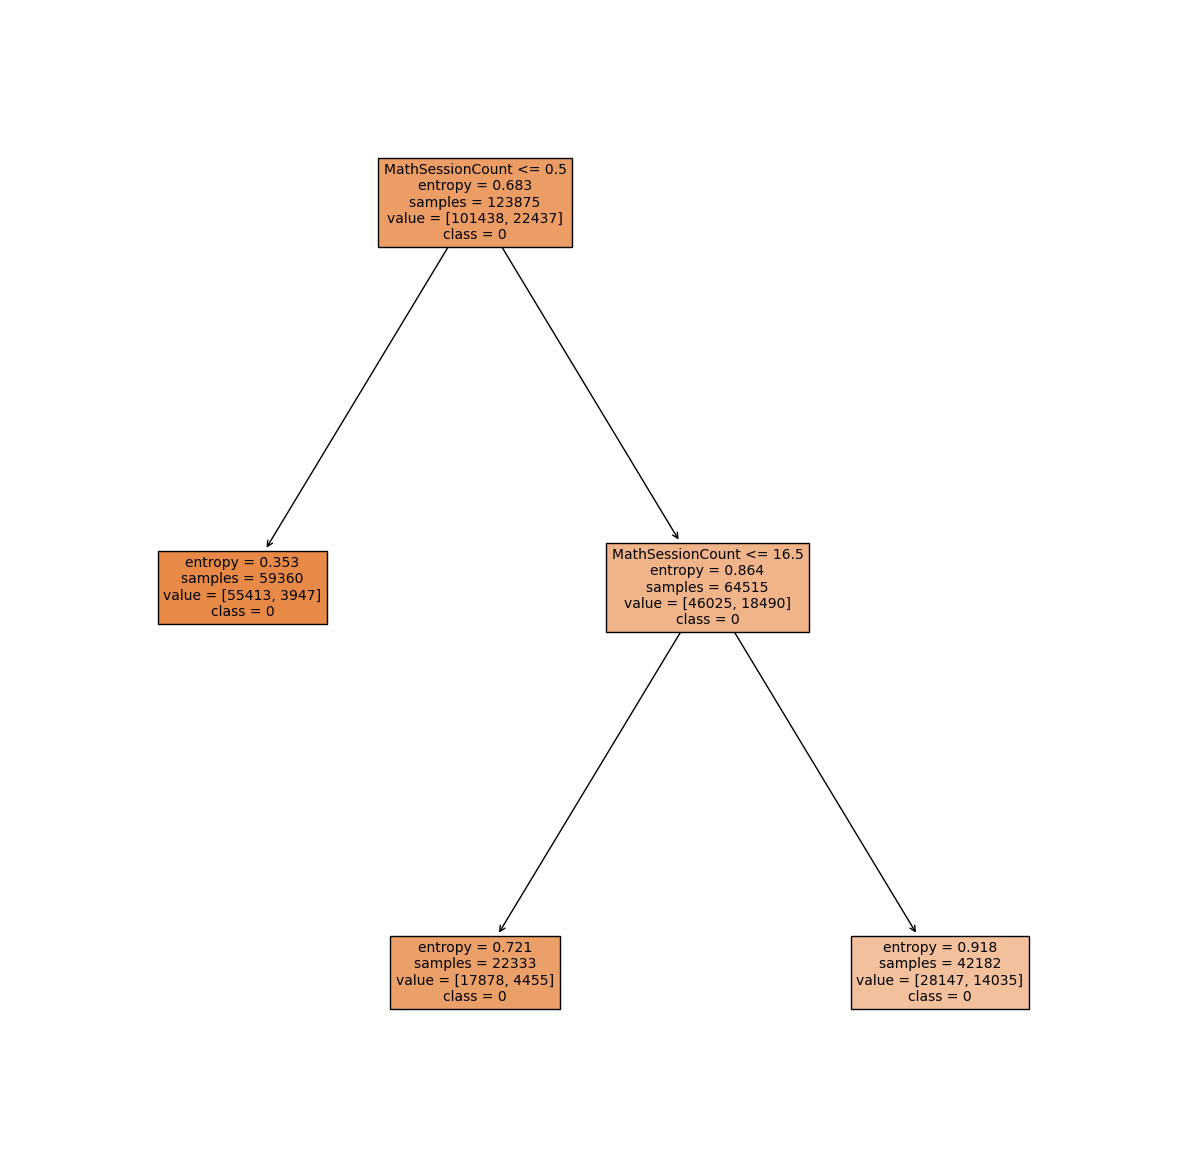

In [92]:
from sklearn import tree
plt.figure(figsize=(15,15))  # set plot size (denoted in inches)
tree.plot_tree(model, feature_names=model.feature_names_in_,class_names=list(df_main['MetMathGrowth']),
               fontsize=10,filled=True)
plt.show()